# Manuel linear regression example

In [45]:
import numpy as np

In [2]:
def linear_regression(x,y):
    a = np.sum((x-np.mean(x)) * (y-np.mean(y)))
    b = np.sum(((x-np.mean(x)) **2))
    m = a/b
    n = (np.sum(y) - m*np.sum(x)) / len(x)
    return m, n

In [3]:
def linear_regression(x, y):
    m = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
    n = np.sum((np.sum(y) - m * np.sum(x))) / len(x)
    return m, n

In [4]:
dataset = np.loadtxt('test.csv', dtype=np.float32, delimiter=',')

In [5]:
m, n = linear_regression(dataset[:, 0], dataset[:, 1])

In [6]:
x = np.linspace(1,15,100)
y = m*x + n

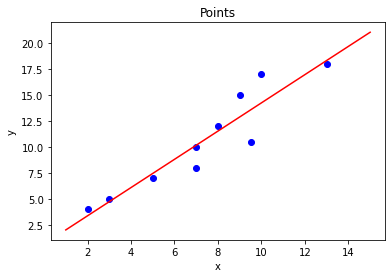

In [8]:
import matplotlib.pyplot as plt
plt.title('Points')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(dataset[:, 0], dataset[:, 1], color='blue')
plt.plot(x, y, color='red')
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()
lr.fit(dataset[:, 0].reshape(-1, 1), dataset[:, 1])

LinearRegression()

In [11]:
x = np.linspace(1, 15, 100)
y = lr.coef_[0] * x + lr.intercept_

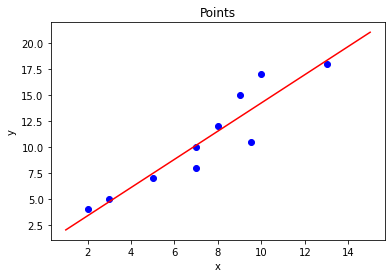

In [12]:
plt.title('Points')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(dataset[:, 0], dataset[:, 1], color='blue')
plt.plot(x, y, color='red')

In [13]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)
%matplotlib inline

In [14]:
data = pd.read_csv('Advertising.csv')

In [15]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


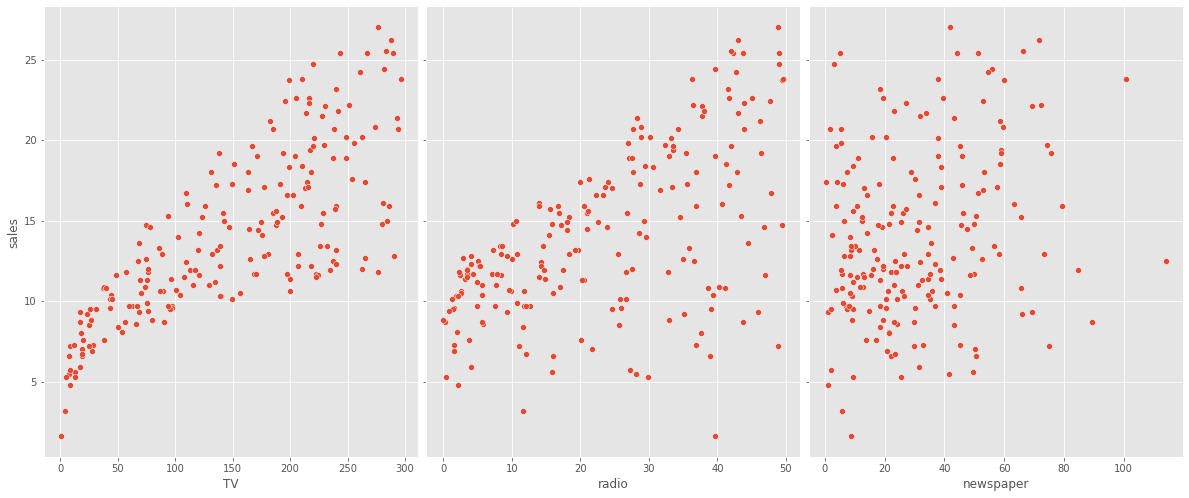

In [16]:
sb.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars=['sales'], height=7, aspect=0.8)

In [17]:
from sklearn.linear_model import LinearRegression

X = data[['TV', 'radio', 'newspaper']]
y = data.sales

linear_model_1 = LinearRegression()
linear_model_1.fit(X, y)

LinearRegression()

In [18]:
linear_model_1.intercept_

2.938889369459412

In [19]:
linear_model_1.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

<AxesSubplot:>

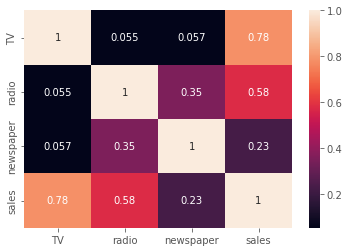

In [20]:
sb.heatmap(data.corr(), annot=True)

In [21]:
from sklearn.metrics import r2_score

linear_model_2 = LinearRegression().fit(X[['TV', 'radio']], y)
lm2_pred = linear_model_2.predict(X[['TV', 'radio']])
print("R Squared: ", r2_score(y, lm2_pred))

R Squared:  0.8971942610828957


# Logistic Regression Example


In [22]:
df = pd.read_csv('diabetes2.csv')

In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


/home/mert_teleskop/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

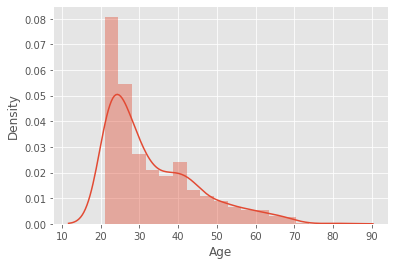

In [26]:
sb.distplot(df['Age'].dropna(),kde=True)

In [27]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

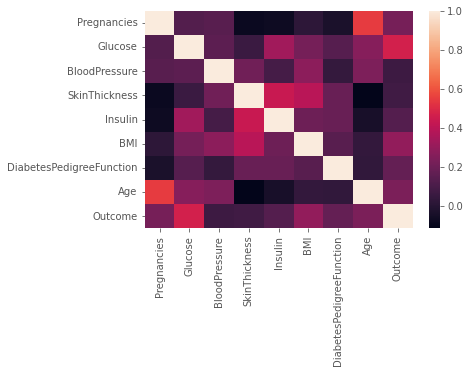

In [28]:
sb.heatmap(df.corr())

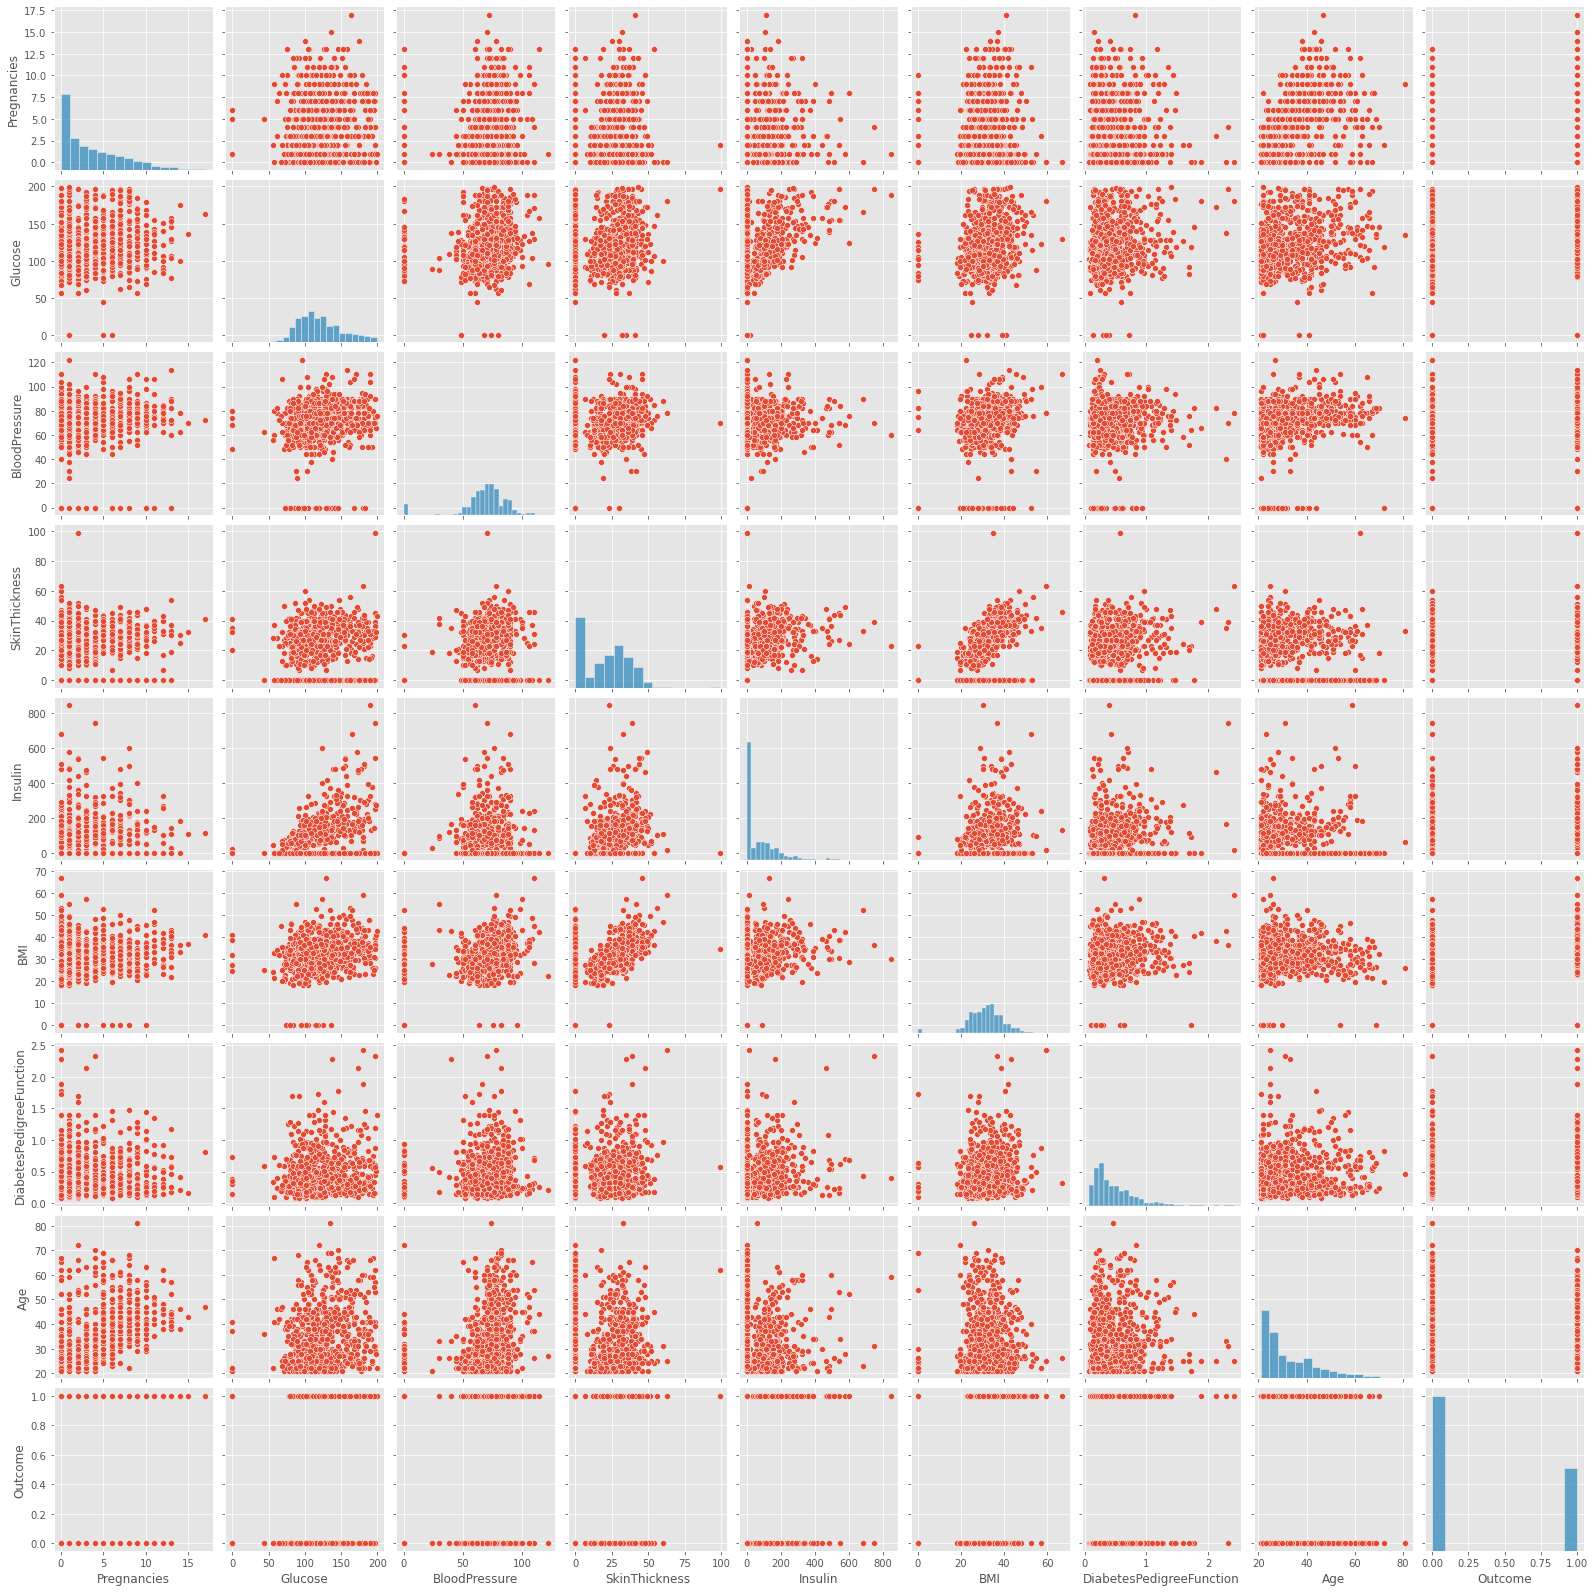

In [29]:
sb.pairplot(df)

In [30]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression()

In [35]:
model.fit(x_train,y_train)

/home/mert_teleskop/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
predictions = model.predict(x_test)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       150
           1       0.75      0.62      0.68        81

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231



In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test,predictions)

array([[133,  17],
       [ 31,  50]])